In [300]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load the dataset
df = pd.read_csv("C:/Users/SIRI SUJALA/Downloads/winequality-red.csv")

# DATA EXPLORATION & CLEANING

In [301]:


df.head() # Display first few rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [302]:
df.info()  # Display summary of data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [303]:
df.describe() # Display statistical summary of numerical columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [304]:
# Check for missing values
print(df.isnull().sum())



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# FEATURE SELECTION & FEATURE ENGINEERING

In [305]:
# Handle categorical variables
df['quality'] = df['quality'].apply(lambda x: 'low' if x <= 5 else 'medium' if x <= 7 else 'high')
df['quality'] = df['quality'].astype('category')

# Perform feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('quality', axis=1)
X = scaler.fit_transform(X)

# Split data into features (X) and target (y)
y = df['quality']

# Create a new feature 'total_acidity' as the sum of fixed acidity and volatile acidity
df1 = df.copy()
df1['total_acidity'] = df1['fixed acidity'] + df1['volatile acidity']
df1.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total_acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,low,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,low,8.56
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium,11.48
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low,8.10


# DATA VISUALIZATION & EDA

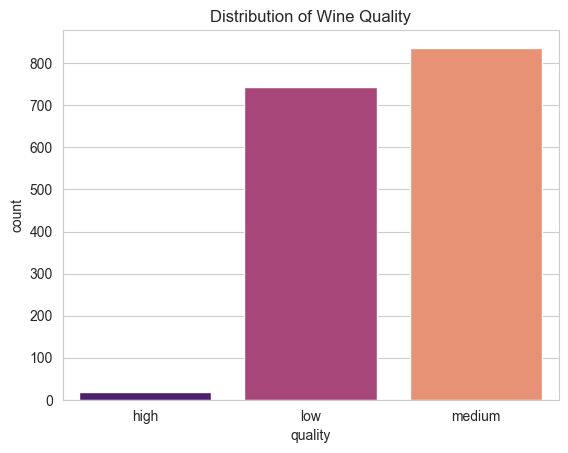

In [306]:
# Visualize the data
sns.countplot(x='quality', palette='magma', data=df)
plt.title('Distribution of Wine Quality')
plt.show()


In [307]:
sns.set_style("whitegrid")

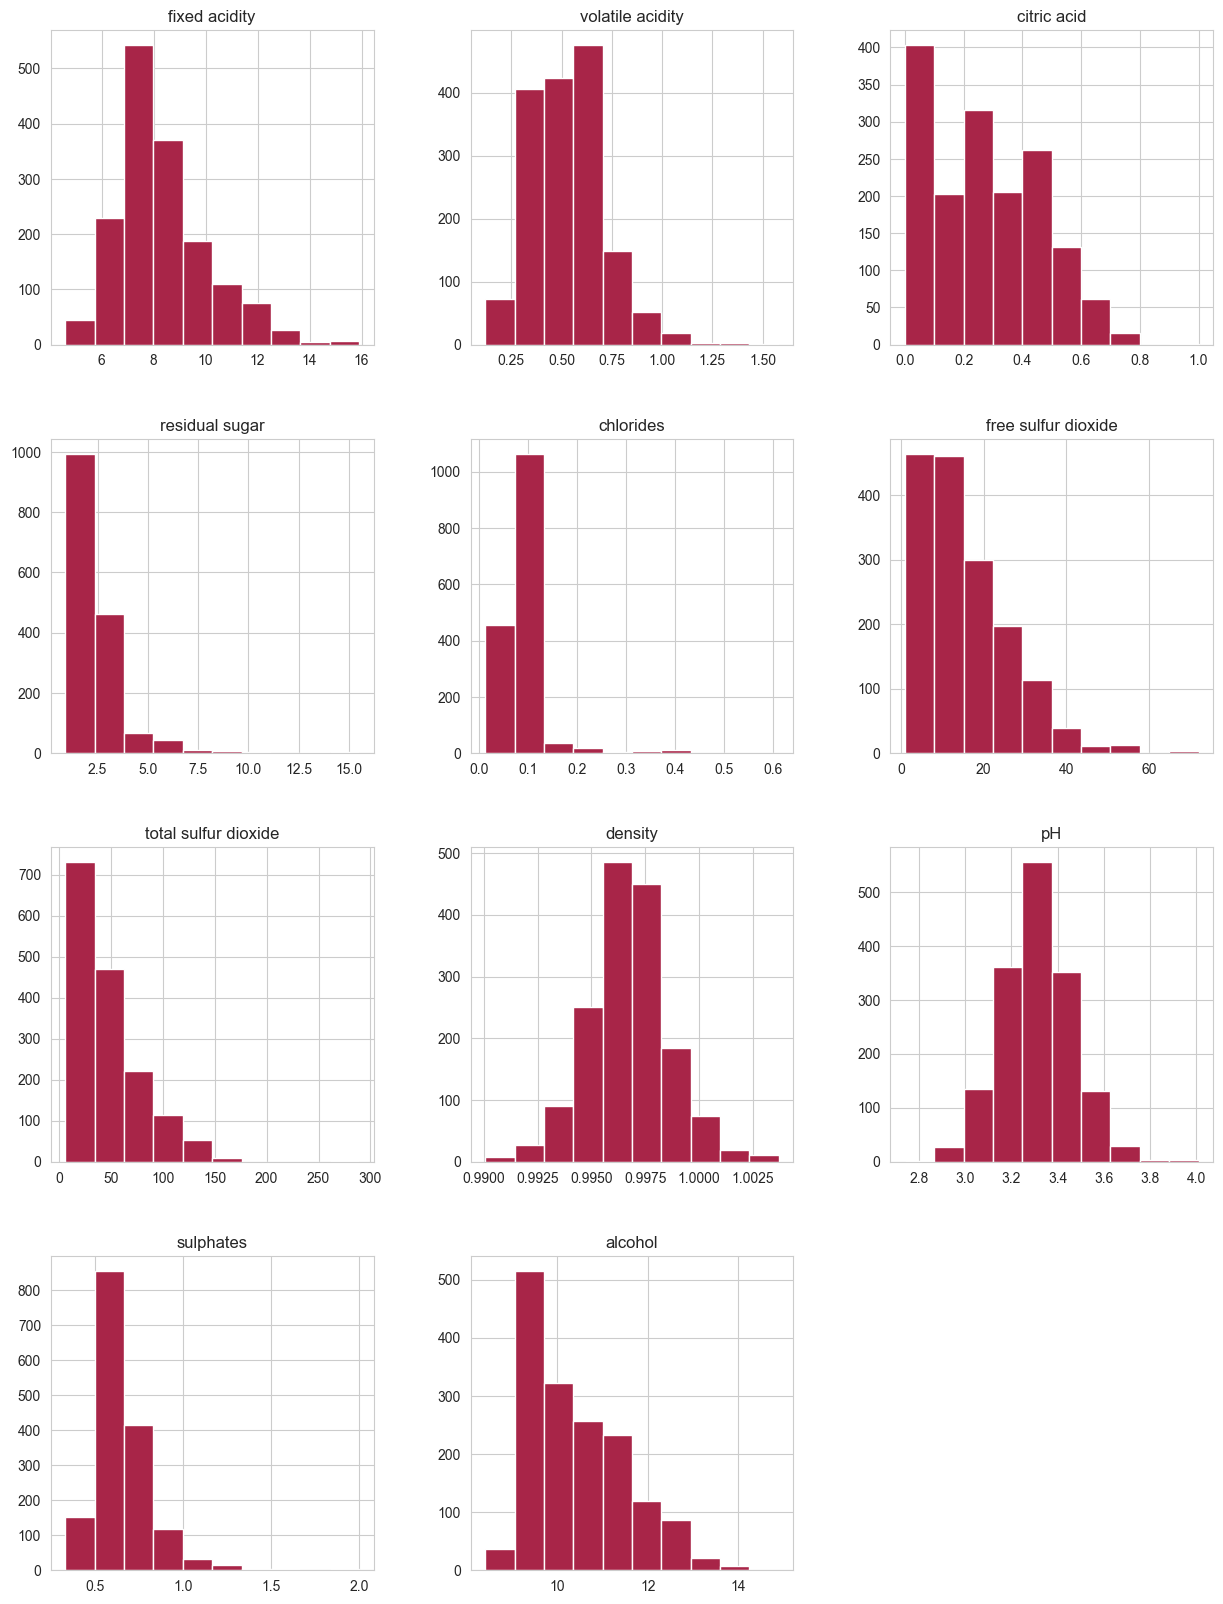

In [308]:
df.hist(figsize=(15,20), color="#A82548");

C:\Users\SIRI SUJALA\AppData\Local\Temp\ipykernel_13928\3402204203.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), alpha=0.5, cmap="Greens")


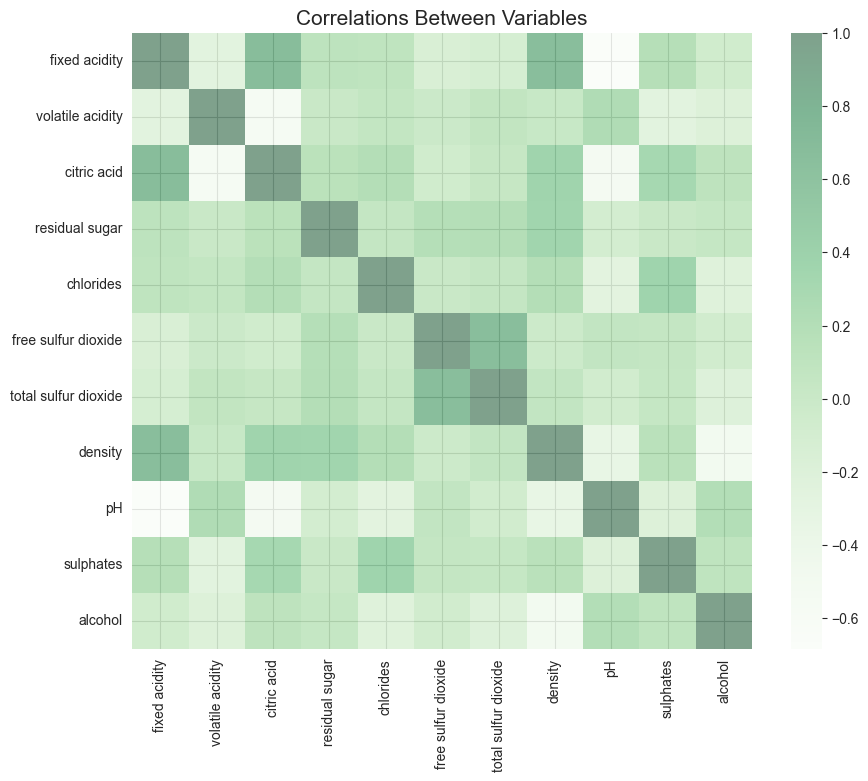

In [309]:
#Visualizing the correlations between numerical variables

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), alpha=0.5, cmap="Greens")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [310]:
#catplot for bhk vs price

def cat_plot(data,title):
    sns.catplot(x="alcohol", y="quality", palette="magma", alpha=0.5, data=data)
    plt.title('alcohol vs the quality of red wine '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

C:\Users\SIRI SUJALA\AppData\Local\Temp\ipykernel_13928\2193385557.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="alcohol", y="quality", palette="magma", alpha=0.5, data=data)


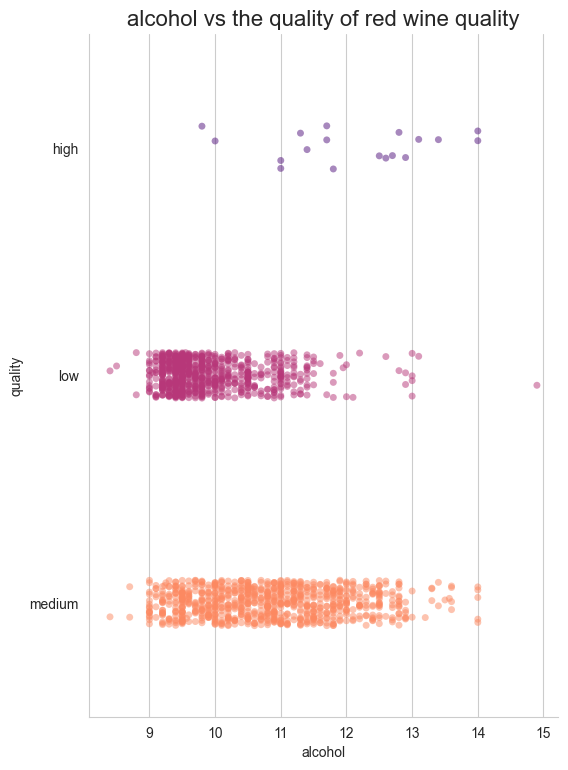

In [311]:
cat_plot(df ,"quality")

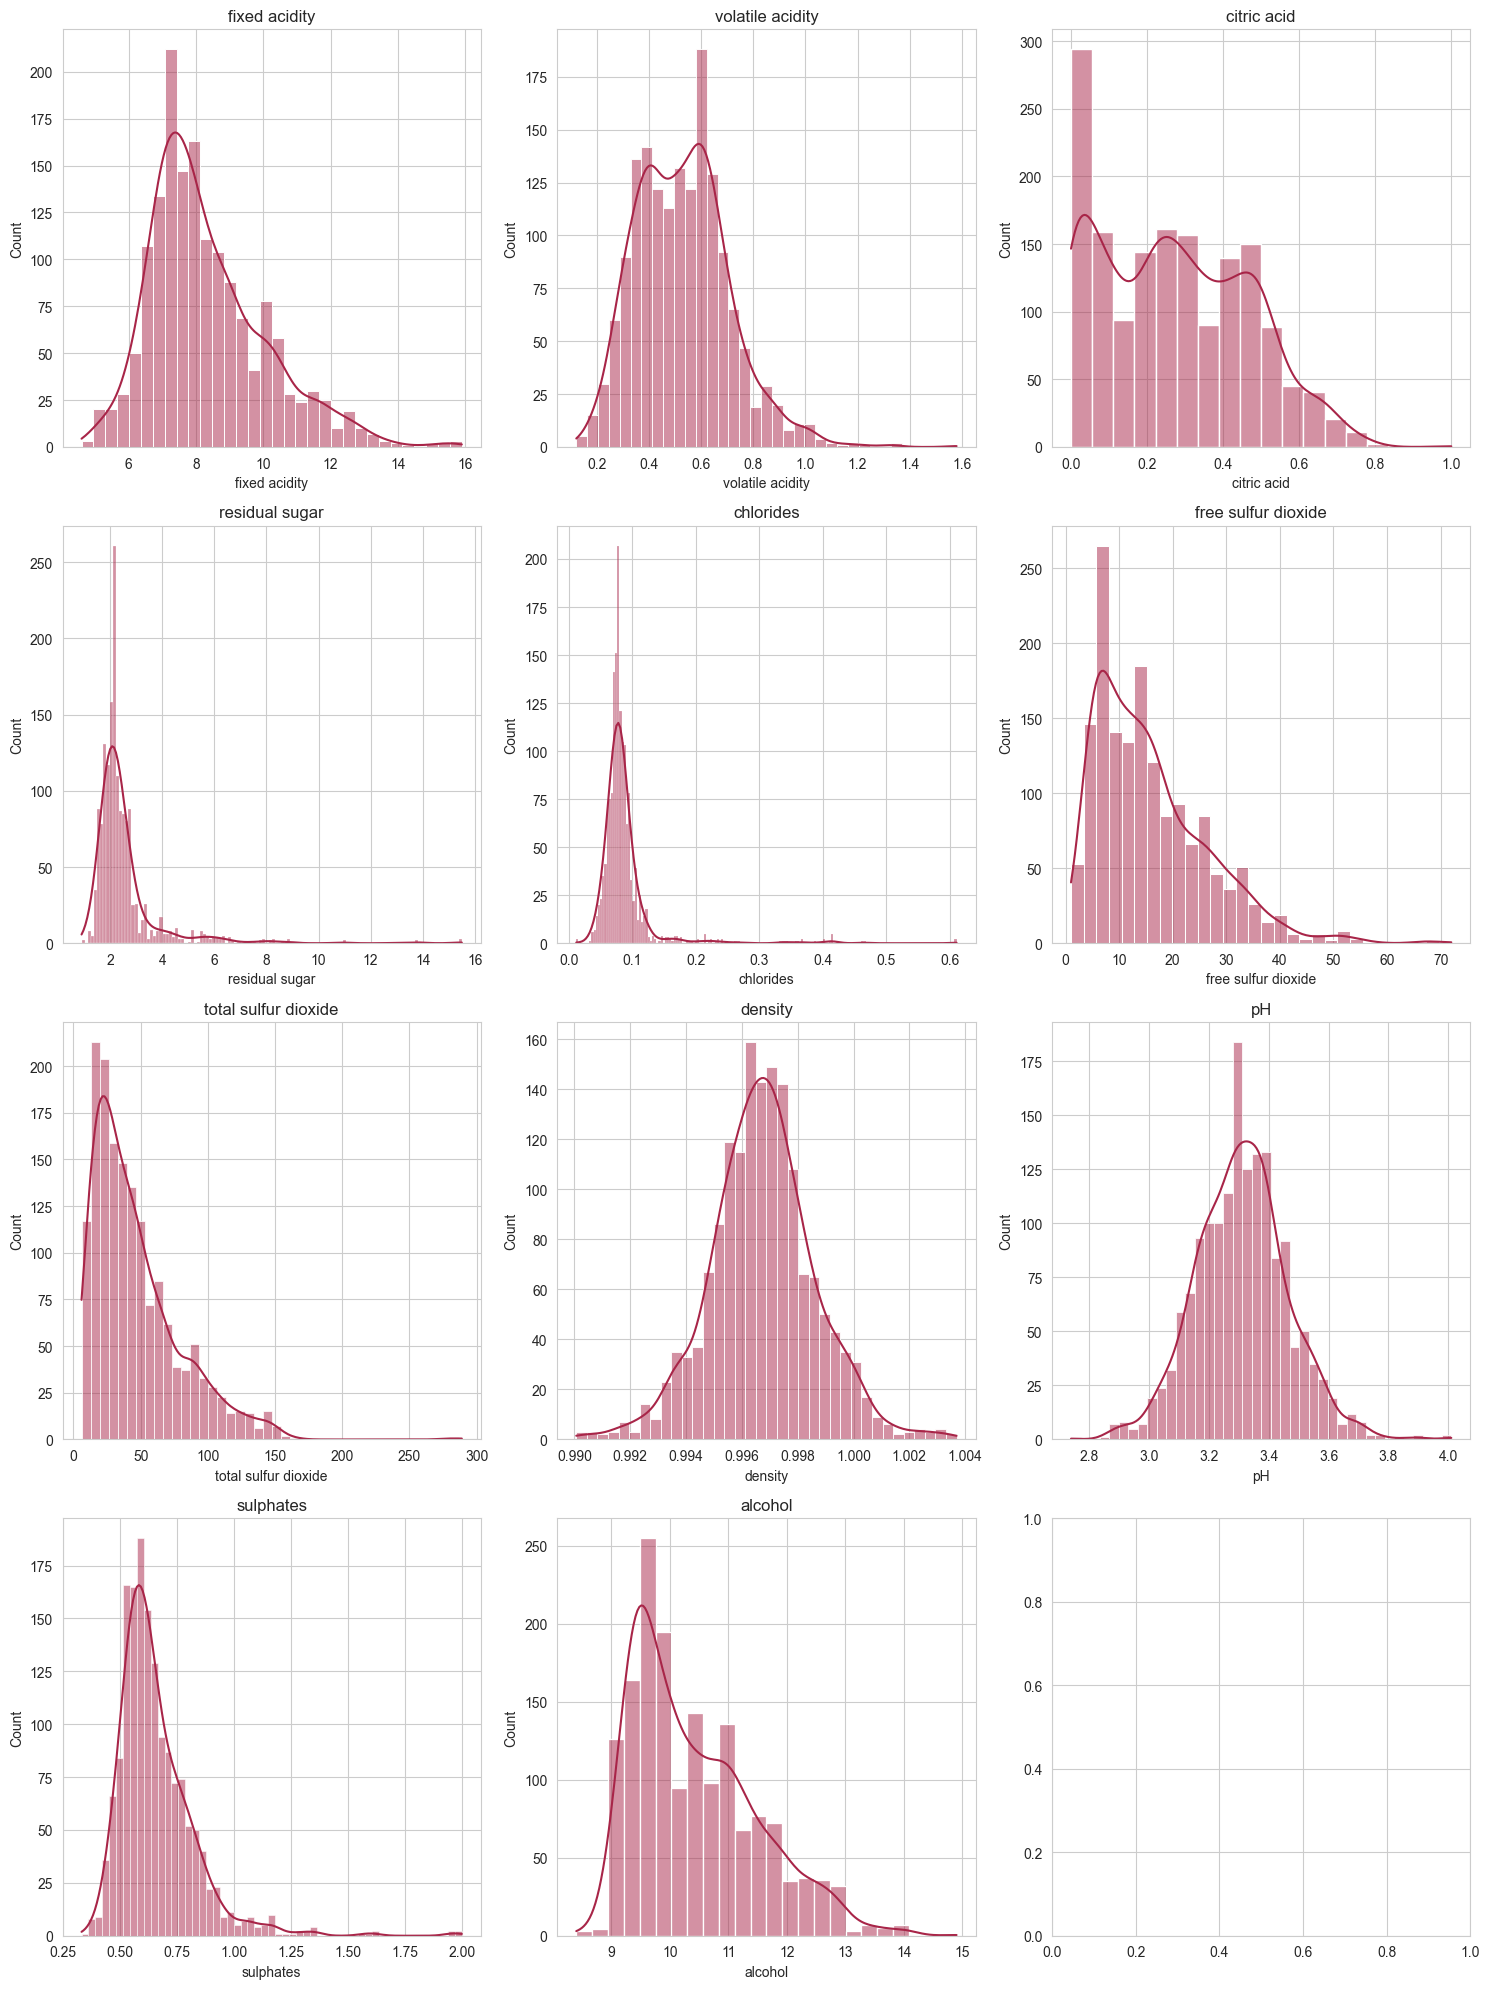

In [312]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

for col, ax in zip(numerical_cols, axs.flat): #iterating over numerical columns, and its respective subplot in flattened axes using zip()
    #col contains number of current numerical column and ax contains the current subplot
    sns.histplot(data=df, x=col, kde=True, ax=ax, color="#A82548")
    ax.set(title=col)
    if ax.get_subplotspec().is_last_row():
        ax.set(xlabel=col)

plt.tight_layout() #adjust the spacing between the subplots to eliminate overlapping
plt.show()

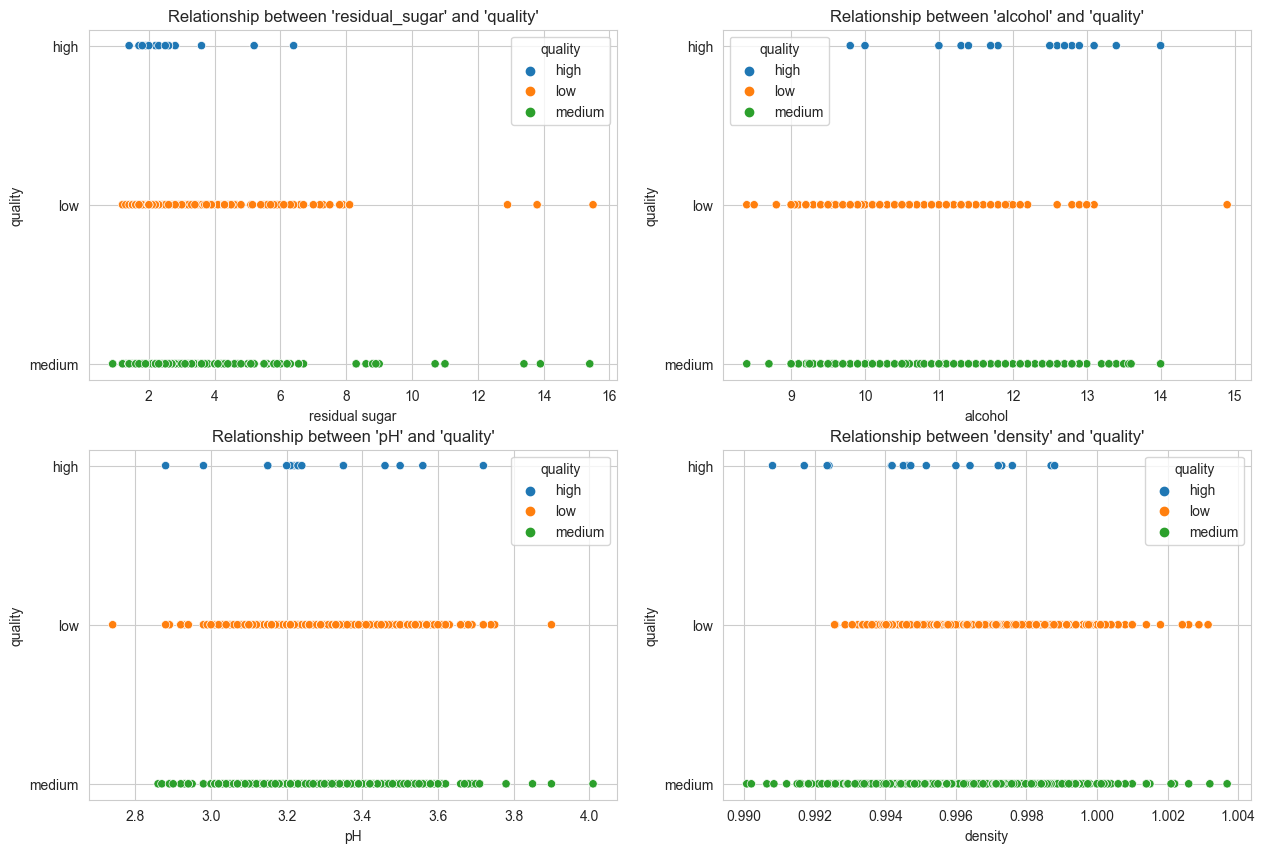

In [313]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10)) # subplots is used to make multiple plots in the same block
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "residual sugar",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'residual_sugar' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "alcohol",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'alcohol' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "pH",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'pH' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "density",
                y = "quality", hue = "quality",
                data = df).set(title = "Relationship between 'density' and 'quality'");

C:\Users\SIRI SUJALA\AppData\Local\Temp\ipykernel_13928\2303292123.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidths = 2, alpha=0.7, cmap = "magma");


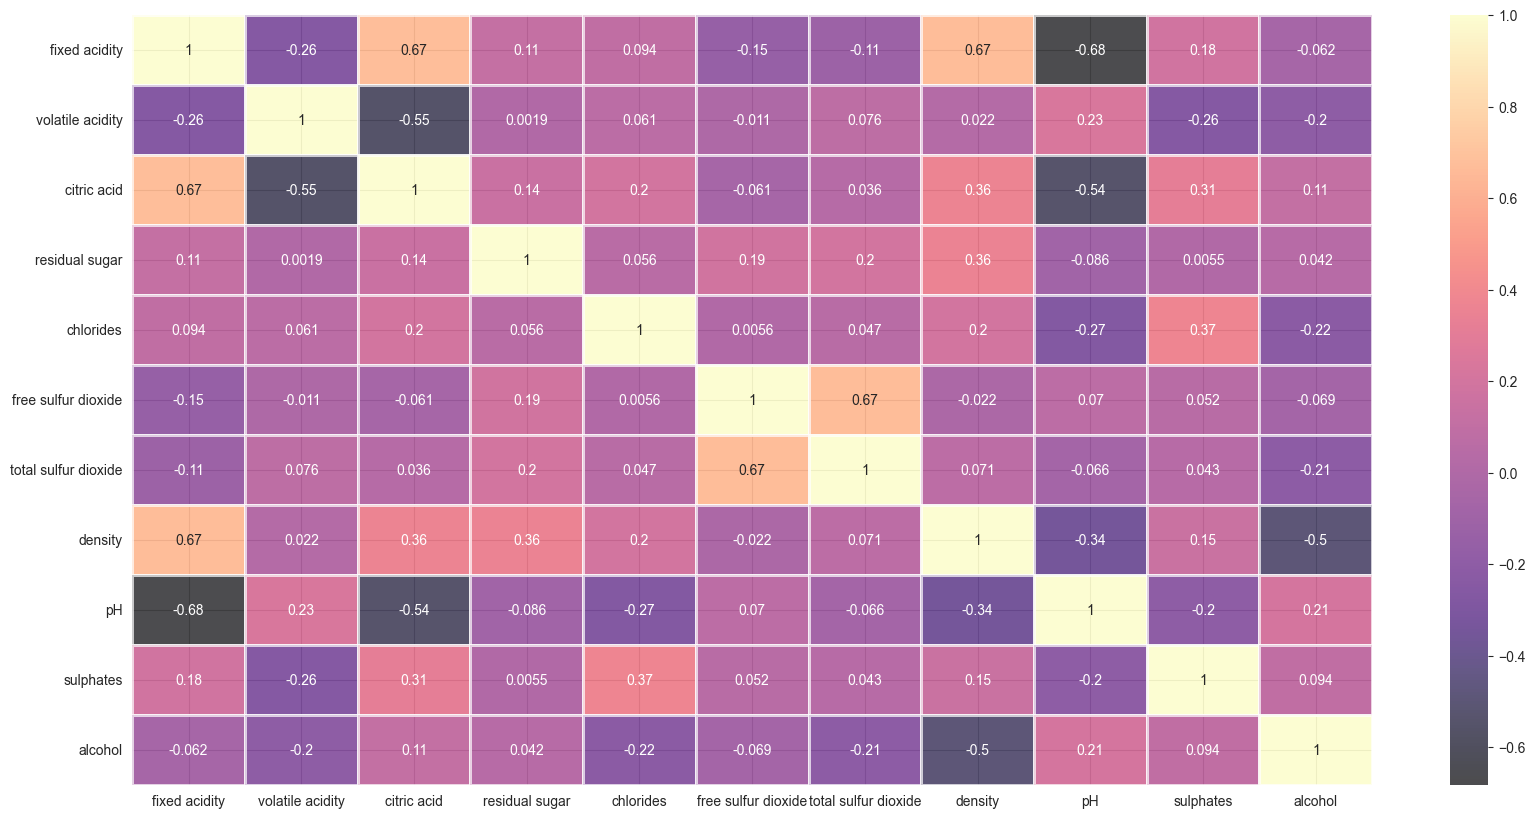

In [314]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths = 2, alpha=0.7, cmap = "magma");

 # MODEL BUILDING

In [315]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# MODEL SELECTION & HYPER PARAMETER TUNING

**KNN**

In [316]:
# Train and evaluate KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print('KNN Accuracy:', acc_knn)
print('Classification Report:', classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.6875
Classification Report:               precision    recall  f1-score   support

        high       0.00      0.00      0.00         5
         low       0.68      0.62      0.65       141
      medium       0.70      0.76      0.73       174

    accuracy                           0.69       320
   macro avg       0.46      0.46      0.46       320
weighted avg       0.68      0.69      0.68       320



In [317]:
# Hyper parameter tuning

knn_params = {"n_neighbors": np.arange(2, 40),
             "weights": ["uniform", "distance"],
             "p": [1, 2]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [318]:
print("Best score for train set: " + str(knn_cv_model.best_score_))

print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nbest weights: " + knn_cv_model.best_params_["weights"],
     "\nbest value of p: " + str(knn_cv_model.best_params_["p"])) 

Best score for train set: 0.8069205216535433
best K value: 14 
best weights: distance 
best value of p: 2


In [319]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                weights = knn_cv_model.best_params_["weights"],
                                p = knn_cv_model.best_params_["p"],
                                )

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14, weights='distance')

In [320]:
y_pred = knn_model.predict(X_test)
newacc_knn = accuracy_score(y_test, y_pred)
print('KNN accuracy after hypertuning', newacc_knn)

KNN accuracy after hypertuning 0.75625


**LOGISTIC REGRESSION**

In [321]:
# Train and evaluate Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print('Logistic Regression Accuracy:', acc_lr)
print('Classification Report:', classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.721875
Classification Report:               precision    recall  f1-score   support

        high       0.00      0.00      0.00         5
         low       0.69      0.74      0.71       141
      medium       0.75      0.72      0.74       174

    accuracy                           0.72       320
   macro avg       0.48      0.49      0.48       320
weighted avg       0.71      0.72      0.72       320



c:\Users\SIRI SUJALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SIRI SUJALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SIRI SUJALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [322]:
# Hyper parameter tuning

lr_params = {"C": [0.5, 0.75, 1, 1.5, 1.5, 2]}

lr_cv_model = GridSearchCV(lr, lr_params, cv = 10)
lr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 0.75, 1, 1.5, 1.5, 2]})

In [323]:
print("Best score for train set: " + str(lr_cv_model.best_score_))

print("best C value: " + str(lr_cv_model.best_params_["C"]))

Best score for train set: 0.7349717027559055
best C value: 0.5


In [324]:
lr_model = LogisticRegression(C = 2)
lr_model.fit(X_train, y_train)

LogisticRegression(C=2)

In [325]:
y_pred = lr_model.predict(X_test)
newacc_lr = accuracy_score(y_test, y_pred)
print('Logistic regression accuracy after hypertuning', newacc_lr)

Logistic regression accuracy after hypertuning 0.725


**DECISION TREE**

In [326]:
# Train and evaluate Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Accuracy:', acc_dt)
print('Classification Report:', classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.721875
Classification Report:               precision    recall  f1-score   support

        high       0.25      0.20      0.22         5
         low       0.71      0.71      0.71       141
      medium       0.74      0.75      0.74       174

    accuracy                           0.72       320
   macro avg       0.57      0.55      0.56       320
weighted avg       0.72      0.72      0.72       320



In [327]:
# Hyper parameter tuning

dt_params = {"criterion": ["gini", "entropy"],
             "max_depth": [3, 4, 5, 6, 7],
             "max_features": [4, 5, 6, 7],
             "min_samples_split": [2, 3, 4, 5, 6]}

dt_cv_model = GridSearchCV(dt, dt_params, cv = 10)
dt_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [328]:
print("Best score for train set: " + str(dt_cv_model.best_score_))

print("best criterion : " + dt_cv_model.best_params_["criterion"],
     "\nbest max_depth: " + str(dt_cv_model.best_params_["max_depth"]),
     "\nbest max_features: " + str(dt_cv_model.best_params_["max_features"]),
     "\nbest min_samples_split: " + str(dt_cv_model.best_params_["min_samples_split"]))

Best score for train set: 0.738115157480315
best criterion : gini 
best max_depth: 7 
best max_features: 6 
best min_samples_split: 5


In [329]:
dt = DecisionTreeClassifier(criterion = dt_cv_model.best_params_["criterion"],
                                 max_depth = dt_cv_model.best_params_["max_depth"],
                                 max_features = dt_cv_model.best_params_["max_features"],
                                 min_samples_split = dt_cv_model.best_params_["min_samples_split"])
dt_model = dt.fit(X_train, y_train)

In [330]:
y_pred = dt_model.predict(X_test)
newacc_dt = accuracy_score(y_test, y_pred)
print('Decision tree accuracy after hypertuning', newacc_dt)

Decision tree accuracy after hypertuning 0.671875


**RANDOM FOREST**

In [331]:
# Train and evaluate Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', acc_rf)
print('Classification Report:', classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.78125
Classification Report:               precision    recall  f1-score   support

        high       0.00      0.00      0.00         5
         low       0.77      0.77      0.77       141
      medium       0.79      0.81      0.80       174

    accuracy                           0.78       320
   macro avg       0.52      0.53      0.52       320
weighted avg       0.77      0.78      0.78       320



In [332]:
# Hyper parameter tuning

# rf_params = {
# #               "n_estimators": [100, 150, 250,],
# #               "max_depth": [2, 3, 5, 7],
# #               "min_samples_split": [2, 3, 4, 6]
# #             }


rf_params = {

'n_estimators': [50, 100, 200, 300],  # no of trees in the forest
    'max_depth': [None, 10, 20, 30],  # max depth of trees
    'min_samples_split': [2, 5, 10],  # min no of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # min no of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # no of features to consider when looking for the best split
    'random_state': [42]  # seed for random number generation

}

rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1)
rf_cv_model.fit(X_train, y_train)

c:\Users\SIRI SUJALA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300],
                         'random_state': [42]})

In [333]:
print("Best score for train set: " + str(rf_cv_model.best_score_))

print("\nbest n_estimators: " + str(rf_cv_model.best_params_["n_estimators"]),
     "\nbest max_depth: " + str(rf_cv_model.best_params_["max_depth"]),
     "\nbest min_samples_split: " + str(rf_cv_model.best_params_["min_samples_split"]))

Best score for train set: 0.8123954232283465

best n_estimators: 200 
best max_depth: 20 
best min_samples_split: 2


In [334]:
rf = RandomForestClassifier(
                                 max_depth = rf_cv_model.best_params_["max_depth"],
                                 n_estimators = rf_cv_model.best_params_["n_estimators"],
                                 min_samples_split = rf_cv_model.best_params_["min_samples_split"],
                                #  min_samples_leaf = rf_cv_model.best_params_["min_samples_leaf"],
                                #  max_features = rf_cv_model.best_params_["max_features"],
                                 )

rf_model = rf.fit(X_train, y_train)

In [335]:
y_pred = rf_model.predict(X_test)
newacc_rf = accuracy_score(y_test, y_pred)
print('Random forest accuracy after hypertuning', newacc_rf)

Random forest accuracy after hypertuning 0.78125


# COMPARING ACCCURACIES

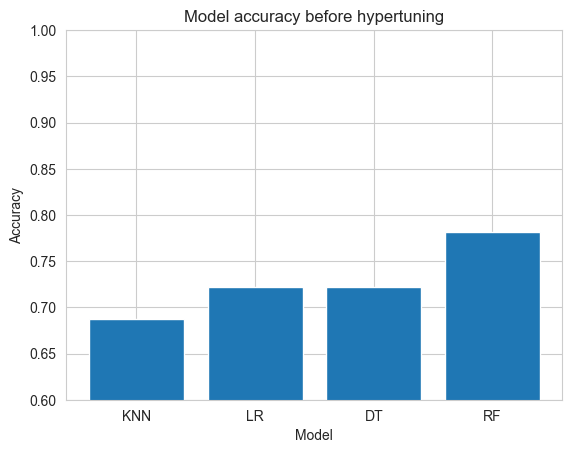

Best Model: RF


In [336]:
# Compare model performance
models = ['KNN', 'LR', 'DT', 'RF']
accuracies = [acc_knn, acc_lr, acc_dt, acc_rf]

color = "#800020"

plt.bar(models, accuracies)
plt.title('Model accuracy before hypertuning')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.0)
plt.show()

# Select the best-performing model
best_model_idx = accuracies.index(max(accuracies))
best_model = models[best_model_idx]
print('Best Model:', best_model)


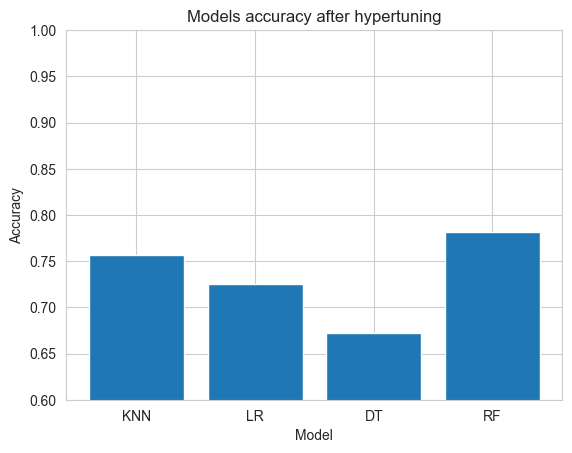

Best Model: RF


In [337]:
# Compare model performance after hypertuning
models = ['KNN', 'LR', 'DT', 'RF']
accuracies = [newacc_knn, newacc_lr, newacc_dt, newacc_rf]

plt.bar(models, accuracies)
plt.title('Models accuracy after hypertuning')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.0)
# plt.color("#A82548")
plt.show()

# Select the best-performing model
best_model_idx = accuracies.index(max(accuracies))
best_model = models[best_model_idx]
print('Best Model:', best_model)


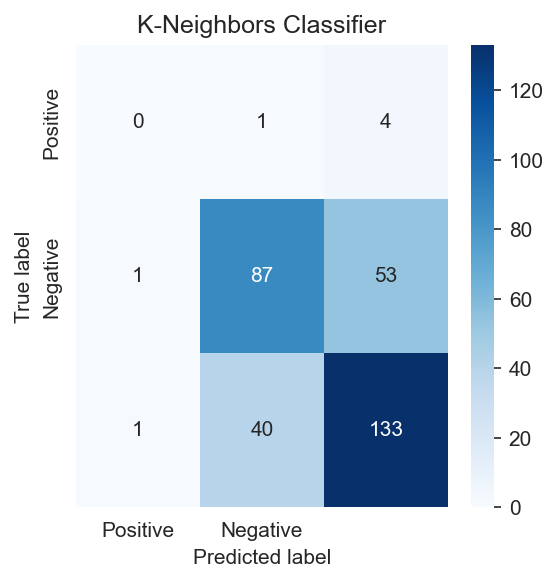

In [338]:
y_pred_knn = knn.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Confusion matrix for rfc

plt.figure(figsize=(4,4),dpi=150)
confusion_matrix_knn = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(confusion_matrix_knn,annot=True,xticklabels=['Positive','Negative'], yticklabels=[ 'Positive','Negative'],
           cmap='Blues',fmt='d')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("K-Neighbors Classifier")
plt.show()

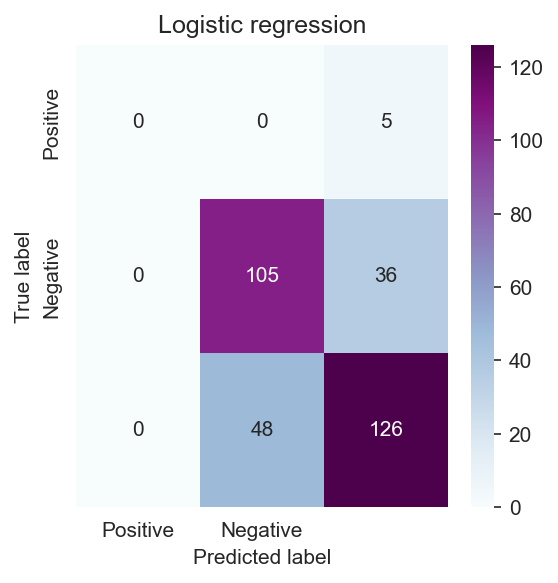

In [339]:
plt.figure(figsize=(4,4),dpi=150)
confusion_matrix_lr = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(confusion_matrix_lr, annot=True, xticklabels=['Positive','Negative'], yticklabels=[ 'Positive','Negative'],
           cmap='BuPu',fmt='d')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Logistic regression")
plt.show()

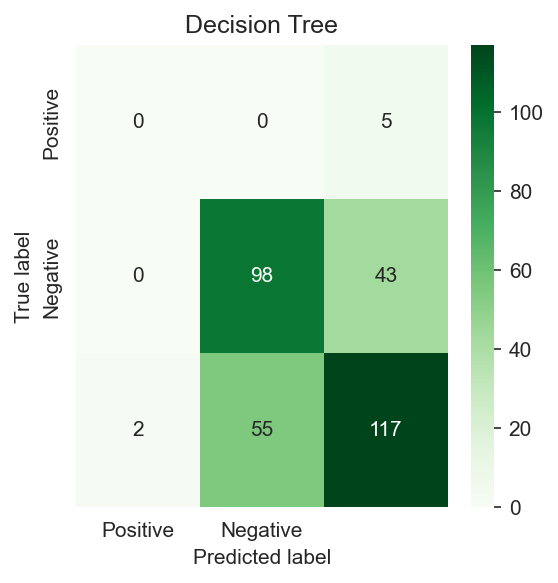

In [340]:
plt.figure(figsize=(4,4),dpi=150)
confusion_matrix_dt = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(confusion_matrix_dt, annot=True, xticklabels=['Positive','Negative'], yticklabels=[ 'Positive','Negative'],
           cmap='Greens',fmt='d')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Decision Tree")
plt.show()

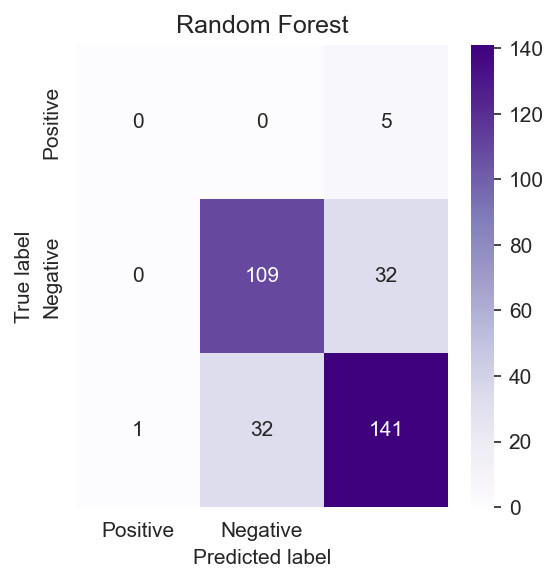

In [341]:
plt.figure(figsize=(4,4),dpi=150)
confusion_matrix_rf = confusion_matrix(y_test,y_pred_rf)
sns.heatmap(confusion_matrix_rf, annot=True, xticklabels=['Positive','Negative'], yticklabels=[ 'Positive','Negative'],
           cmap='Purples',fmt='d')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Random Forest")
plt.show()